<a href="https://colab.research.google.com/github/RayenBoukhchina/Solar-Energy-Forecasting-System/blob/main/Solar_Energy_Forecasting_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
# Load the power production dataset
file_path = r"/content/PV_Elec_Gas3.csv"
data = pd.read_csv(file_path)
print("Power Production Dataset")
data

Power Production Dataset


,date,Cumulative_solar_power,kWh electricity/day,Gas/day
0,26/10/2011,0.1,15.1,9.0
1,27/10/2011,10.2,7.4,9.2
2,28/10/2011,20.2,5.8,8.0
3,29/10/2011,29.6,4.9,6.6
4,30/10/2011,34.2,11.7,5.3
...,...,...,...,...
3299,6/11/2020,36445.0,16.0,11.0
3300,7/11/2020,36453.0,13.0,13.0
3301,8/11/2020,36461.0,12.0,11.0
3302,9/11/2020,36466.0,14.0,10.0


In [ ]:
# Load the weather dataset
weather_file_path = r"/content/weather_in_Antwerp.csv"
weather_data = pd.read_csv(weather_file_path, delimiter=';')
print("Weather Dataset")
weather_data

Weather Dataset


,Unnamed: 0,clock,temp,weather,wind,humidity,barometer,visibility,year,month,day
0,0,00:20,11 °C,Mostly cloudy.,17 km/h,94%,1011 mbar,5 km,2012,1,1
1,1,00:50,12 °C,Mostly cloudy.,17 km/h,88%,1011 mbar,NaN,2012,1,1
2,2,01:50,12 °C,Overcast.,19 km/h,88%,1011 mbar,9 km,2012,1,1
3,3,02:20,12 °C,Partly cloudy.,17 km/h,88%,1010 mbar,NaN,2012,1,1
4,4,02:50,12 °C,Sprinkles. Mostly cloudy.,15 km/h,88%,1010 mbar,NaN,2012,1,1
...,...,...,...,...,...,...,...,...,...,...,...
133664,1398,21:20,5 °C,Passing clouds.,13 km/h,57%,1029 mbar,NaN,2019,12,30
133665,1399,21:50,5 °C,Clear.,13 km/h,61%,1029 mbar,16 km,2019,12,30
133666,1400,22:20,5 °C,Passing clouds.,11 km/h,57%,1029 mbar,NaN,2019,12,30
133667,1401,23:20,4 °C,Clear.,11 km/h,65%,1029 mbar,16 km,2019,12,30


In [ ]:
data['Daily Production'] = 0
data['Daily Production'] = data['Cumulative_solar_power'].diff()

In [ ]:
# Convert 'date' column to datetime
data['date'] = pd.to_datetime(data['date'], format='%d/%m/%Y')

# Define the start and end dates
start_date = pd.to_datetime('01/01/2012', format='%d/%m/%Y')
end_date = pd.to_datetime('30/12/2019', format='%d/%m/%Y')

# Filtering the power data so it has the same range as weather_data
data = data[(data['date'] >= start_date) & (data['date'] <= end_date)]

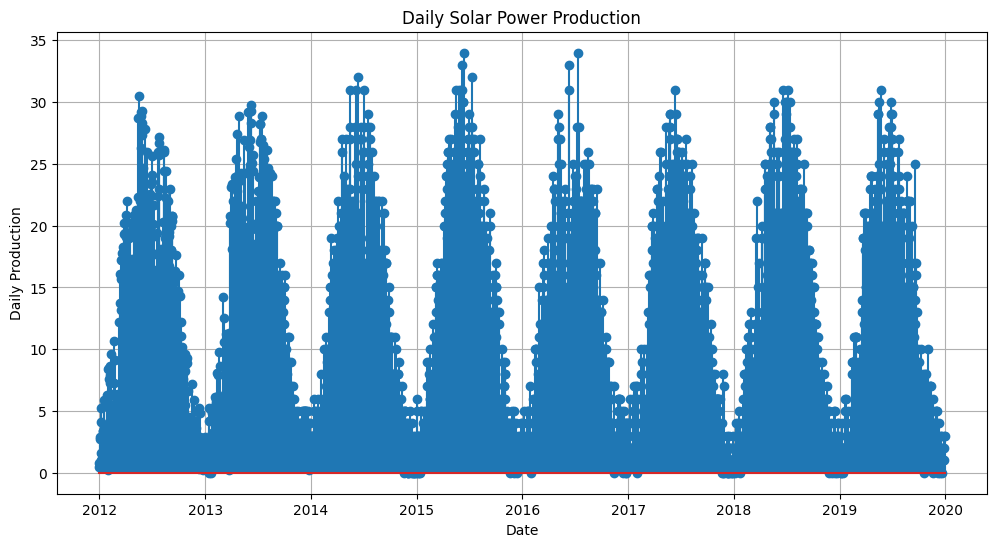

In [ ]:
# Plotting the data
plt.figure(figsize=(12, 6))
plt.stem(data['date'], data['Daily Production'])
plt.title("Daily Solar Power Production")
plt.xlabel("Date")
plt.ylabel("Daily Production")
plt.grid(True)
plt.show()


In [ ]:
duplicated_dataset = weather_data.copy()
# Create a 'Date' column by combining 'year', 'month', and 'day'
duplicated_dataset['Date'] = pd.to_datetime(duplicated_dataset[['year', 'month', 'day']])

# Drop the original 'year', 'month', and 'day' columns
duplicated_dataset= duplicated_dataset.drop(columns=['year', 'month', 'day'])
duplicated_dataset.drop(columns={'Unnamed: 0'})

,clock,temp,weather,wind,humidity,barometer,visibility,Date
0,00:20,11 °C,Mostly cloudy.,17 km/h,94%,1011 mbar,5 km,2012-01-01
1,00:50,12 °C,Mostly cloudy.,17 km/h,88%,1011 mbar,NaN,2012-01-01
2,01:50,12 °C,Overcast.,19 km/h,88%,1011 mbar,9 km,2012-01-01
3,02:20,12 °C,Partly cloudy.,17 km/h,88%,1010 mbar,NaN,2012-01-01
4,02:50,12 °C,Sprinkles. Mostly cloudy.,15 km/h,88%,1010 mbar,NaN,2012-01-01
...,...,...,...,...,...,...,...,...
133664,21:20,5 °C,Passing clouds.,13 km/h,57%,1029 mbar,NaN,2019-12-30
133665,21:50,5 °C,Clear.,13 km/h,61%,1029 mbar,16 km,2019-12-30
133666,22:20,5 °C,Passing clouds.,11 km/h,57%,1029 mbar,NaN,2019-12-30
133667,23:20,4 °C,Clear.,11 km/h,65%,1029 mbar,16 km,2019-12-30


In [ ]:
# Example function to calculate sunrise and sunset times
def sunrise_sunset(date):
    day_of_year = date.timetuple().tm_yday
    # Example calculation, replace with your accurate method
    sunrise_time = datetime.combine(date, datetime.min.time()) + timedelta(hours=6, minutes=0) + timedelta(minutes=(30 * np.sin((day_of_year - 80) * 2 * np.pi / 365)))
    sunset_time = datetime.combine(date, datetime.min.time()) + timedelta(hours=18, minutes=0) + timedelta(minutes=(-30 * np.sin((day_of_year - 80) * 2 * np.pi / 365)))
    return sunrise_time.time(), sunset_time.time()


In [ ]:
#Filtrage des Données par Heures de Lever/Coucher du Soleil

from datetime import datetime, timedelta
import numpy as np
duplicated_dataset = duplicated_dataset.copy()  # Create a copy to avoid SettingWithCopyWarning
duplicated_dataset.loc[:, 'Date'] = pd.to_datetime(duplicated_dataset['Date'], format='%Y-%m-%d')

# Generate date range for entire period 2012-01-01 to 2019-12-30, the same range as the other two datasets
date_range_full = pd.date_range(start='2012-01-01', end='2019-12-30')

# Create a DataFrame for sunrise and sunset times for each date in the range
set_rise = pd.DataFrame(date_range_full, columns=['Date'])

# Apply sunrise_sunset function to set_rise DataFrame to get Sunrise and Sunset times
set_rise['Sunrise'], set_rise['Sunset'] = zip(*set_rise['Date'].apply(sunrise_sunset))

# Merge duplicated_dataset with set_rise on 'Date'
merged_data = pd.merge(duplicated_dataset, set_rise, on='Date')

# Convert 'clock' column to datetime if it's not already
merged_data['clock'] = pd.to_datetime(merged_data['clock'])

# Extract the clock time from 'clock' column
merged_data['clock'] = merged_data['clock'].dt.time

# Filter rows to keep only those where 'clock' is between 'Sunrise' and 'Sunset' for each date
filtered_data1 = merged_data[
    (merged_data['clock'] >= merged_data['Sunrise']) &
    (merged_data['clock'] <= merged_data['Sunset'])
]

print(filtered_data1.head(100))
print(filtered_data1.columns)


     Unnamed: 0     clock   temp                    weather     wind humidity  \
10           10  05:50:00  12 °C  Sprinkles. Mostly cloudy.  19 km/h      88%   
11           11  06:20:00  12 °C                       Fog.  19 km/h      88%   
12           12  06:50:00  12 °C       Sprinkles. Overcast.  19 km/h      88%   
13           13  07:20:00  12 °C             Mostly cloudy.  19 km/h      88%   
14           14  07:50:00  12 °C             Mostly cloudy.  24 km/h      88%   
..          ...       ...    ...                        ...      ...      ...   
170         170  15:20:00   8 °C             Broken clouds.  22 km/h      66%   
171         171  15:50:00   8 °C             Broken clouds.  26 km/h      66%   
172         172  16:20:00   8 °C             Broken clouds.  22 km/h      66%   
173         173  16:50:00   8 °C            Passing clouds.  24 km/h      66%   
174         174  17:20:00   8 °C            Passing clouds.  22 km/h      71%   

     barometer visibility  

<ipython-input-21-0b8687ff4750>:21: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  merged_data['clock'] = pd.to_datetime(merged_data['clock'])


In [ ]:
#remove the km/h,°C , mbar ....
def clean_numeric_column(column):
    if column.dtype == 'object':  # Check if the column is of object type (typically strings)
        return pd.to_numeric(column.str.replace(r'[^\d.]+', '', regex=True), errors='coerce')
    else:
        return pd.to_numeric(column, errors='coerce')  # Convert non-string columns directly

In [ ]:
# Create a copy of filtered_data1 with only the columns to clean
filtered_data = filtered_data1[['temp', 'wind',  'humidity', 'barometer']].copy()

# Clean the relevant columns in filtered_data using clean_numeric_column function
filtered_data['temp'] = clean_numeric_column(filtered_data['temp'])
filtered_data['wind'] = clean_numeric_column(filtered_data['wind'])
filtered_data['humidity'] = clean_numeric_column(filtered_data['humidity'])
filtered_data['barometer'] = clean_numeric_column(filtered_data['barometer'])


# Include sunrise and sunset columns from filtered_data1 in filtered_data
filtered_data[['Date','clock','Sunrise', 'Sunset']] = filtered_data1[['Date','clock','Sunrise', 'Sunset']]
print(filtered_data)

        temp  wind  humidity  barometer       Date     clock          Sunrise  \
10      12.0  19.0      88.0     1010.0 2012-01-01  05:50:00  05:30:39.872985   
11      12.0  19.0      88.0     1010.0 2012-01-01  06:20:00  05:30:39.872985   
12      12.0  19.0      88.0     1010.0 2012-01-01  06:50:00  05:30:39.872985   
13      12.0  19.0      88.0     1010.0 2012-01-01  07:20:00  05:30:39.872985   
14      12.0  24.0      88.0     1010.0 2012-01-01  07:50:00  05:30:39.872985   
...      ...   ...       ...        ...        ...       ...              ...   
133654   8.0  17.0      43.0     1029.0 2019-12-30  16:20:00  05:30:27.947130   
133655   8.0  15.0      43.0     1029.0 2019-12-30  16:50:00  05:30:27.947130   
133656   7.0  11.0      46.0     1029.0 2019-12-30  17:20:00  05:30:27.947130   
133657   7.0  15.0      46.0     1028.0 2019-12-30  17:50:00  05:30:27.947130   
133658   7.0  15.0      46.0     1028.0 2019-12-30  18:20:00  05:30:27.947130   

                 Sunset  
1

In [ ]:
# Group by date and calculate daily means
daily_weather =filtered_data.groupby('Date').agg({
    'temp': 'mean',
    'wind': 'mean',
    'humidity': 'mean',
    'barometer': 'mean',
    'Sunrise': 'first',  # Keep the first occurrence of Sunrise time for each date
    'Sunset': 'first'
}).reset_index()
daily_weather

,Date,temp,wind,humidity,barometer,Sunrise,Sunset
0,2012-01-01,12.520000,19.640000,89.440000,1008.920000,05:30:39.872985,18:29:20.127015
1,2012-01-02,7.880000,17.200000,78.640000,1008.560000,05:30:46.619181,18:29:13.380819
2,2012-01-03,9.230769,38.730769,81.769231,1005.307692,05:30:53.884941,18:29:06.115059
3,2012-01-04,7.461538,26.384615,67.730769,1016.000000,05:31:01.668112,18:28:58.331888
4,2012-01-05,8.863636,40.500000,75.227273,994.727273,05:31:09.966389,18:28:50.033611
...,...,...,...,...,...,...,...
2860,2019-12-26,3.461538,9.269231,90.807692,1022.384615,05:30:10.407768,18:29:49.592232
2861,2019-12-27,6.640000,9.480000,91.400000,1027.720000,05:30:14.000023,18:29:45.999977
2862,2019-12-28,3.346154,6.000000,89.153846,1038.846154,05:30:18.121509,18:29:41.878491
2863,2019-12-29,2.884615,5.840000,83.230769,1036.307692,05:30:22.771004,18:29:37.228996


In [ ]:
daily_weather2=daily_weather.copy()
# Merge the dataframes on the 'date' and 'Date' columns using an inner join
merged_data = pd.merge(daily_weather2, data[['date', 'Daily Production']], left_on='Date', right_on='date', how='inner')

# Assign the 'Daily Production' column from merged_data to daily_weather2
daily_weather2 = merged_data.drop(columns='date')

# Check the result
daily_weather2.head()

,Date,temp,wind,humidity,barometer,Sunrise,Sunset,Daily Production
0,2012-01-01,12.520000,19.640000,89.440000,1008.920000,05:30:39.872985,18:29:20.127015,0.5
1,2012-01-02,7.880000,17.200000,78.640000,1008.560000,05:30:46.619181,18:29:13.380819,0.8
2,2012-01-03,9.230769,38.730769,81.769231,1005.307692,05:30:53.884941,18:29:06.115059,2.9
3,2012-01-04,7.461538,26.384615,67.730769,1016.000000,05:31:01.668112,18:28:58.331888,0.8
4,2012-01-05,8.863636,40.500000,75.227273,994.727273,05:31:09.966389,18:28:50.033611,2.7


In [ ]:
daily_weather3=daily_weather2.copy()
# Ensure 'Date' and 'clock' columns are in the correct format
filtered_data1['Date'] = pd.to_datetime(filtered_data1['Date'])
filtered_data1['clock'] = pd.to_datetime(filtered_data1['clock'], format='%H:%M:%S').dt.time

# Define the target time
target_time = pd.to_datetime('13:20:00', format='%H:%M:%S').time()

# Group by 'Date' and check if 'clock' column contains the target time
dates_with_target_time = filtered_data1.groupby('Date').apply(lambda x: target_time in x['clock'].values)

# Filter the dates where the target time exists
dates_with_target_time = dates_with_target_time[dates_with_target_time].index

# Output the dates
print(dates_with_target_time)

DatetimeIndex(['2012-01-01', '2012-01-02', '2012-01-03', '2012-01-04',
               '2012-01-05', '2012-01-06', '2012-01-07', '2012-01-09',
               '2012-01-10', '2012-01-12',
               ...
               '2019-12-21', '2019-12-22', '2019-12-23', '2019-12-24',
               '2019-12-25', '2019-12-26', '2019-12-27', '2019-12-28',
               '2019-12-29', '2019-12-30'],
              dtype='datetime64[ns]', name='Date', length=2763, freq=None)


<ipython-input-29-5b8cf6e3b68b>:10: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  dates_with_target_time = filtered_data1.groupby('Date').apply(lambda x: target_time in x['clock'].values)


In [ ]:
# Group by 'Date' and check if 'clock' column contains the target time
grouped = filtered_data1.groupby('Date')

# Find dates where target time does not exist
dates_without_target_time = grouped.apply(lambda x: target_time not in x['clock'].values).index


<ipython-input-30-5f7d43cac5c8>:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  dates_without_target_time = grouped.apply(lambda x: target_time not in x['clock'].values).index


In [ ]:
# Function to find the closest time to target_time
def find_closest_time(times, target):
    times = sorted(times)
    closest_time = min(times, key=lambda x: abs(pd.Timestamp.combine(pd.Timestamp.now().date(), x) - pd.Timestamp.combine(pd.Timestamp.now().date(), target)))
    return closest_time

In [ ]:
results = []

for date, group in grouped:
    if target_time in group['clock'].values:
        closest_time = target_time
    else:
        closest_time = find_closest_time(group['clock'].values, target_time)

    weather_cond = group.loc[group['clock'] == closest_time, 'weather'].values[0]
    results.append({'Date': date, 'weather_cond': weather_cond})

In [ ]:
weather_cond_df = pd.DataFrame(results)

# Display the new DataFrame
print(weather_cond_df)

           Date                       weather_cond
0    2012-01-01  Light rain. More clouds than sun.
1    2012-01-02                    Passing clouds.
2    2012-01-03          Light rain. Partly sunny.
3    2012-01-04                     Broken clouds.
4    2012-01-05                      Partly sunny.
...         ...                                ...
2860 2019-12-26                             Sunny.
2861 2019-12-27                     Broken clouds.
2862 2019-12-28                    Passing clouds.
2863 2019-12-29                             Sunny.
2864 2019-12-30                    Passing clouds.

[2865 rows x 2 columns]


In [ ]:
# Assuming daily_weather3 has the 'Date' column in datetime format
daily_weather3['Date'] = pd.to_datetime(daily_weather3['Date'])

# Merge the two DataFrames on 'Date'
daily_weather3 = daily_weather3.merge(weather_cond_df, on='Date', how='left')

# Display the updated daily_weather3 DataFrame
print(daily_weather3)

           Date       temp       wind   humidity    barometer  \
0    2012-01-01  12.520000  19.640000  89.440000  1008.920000   
1    2012-01-02   7.880000  17.200000  78.640000  1008.560000   
2    2012-01-03   9.230769  38.730769  81.769231  1005.307692   
3    2012-01-04   7.461538  26.384615  67.730769  1016.000000   
4    2012-01-05   8.863636  40.500000  75.227273   994.727273   
...         ...        ...        ...        ...          ...   
2860 2019-12-26   3.461538   9.269231  90.807692  1022.384615   
2861 2019-12-27   6.640000   9.480000  91.400000  1027.720000   
2862 2019-12-28   3.346154   6.000000  89.153846  1038.846154   
2863 2019-12-29   2.884615   5.840000  83.230769  1036.307692   
2864 2019-12-30   6.230769  13.000000  48.269231  1030.269231   

              Sunrise           Sunset  Daily Production  \
0     05:30:39.872985  18:29:20.127015               0.5   
1     05:30:46.619181  18:29:13.380819               0.8   
2     05:30:53.884941  18:29:06.115059 

In [ ]:
# Extract all unique values from the 'Weather' column
unique_weather_conditions = daily_weather3['weather_cond'].unique()

# Print the unique weather conditions
print(unique_weather_conditions)

['Light rain. More clouds than sun.' 'Passing clouds.'
 'Light rain. Partly sunny.' 'Broken clouds.' 'Partly sunny.'
 'Scattered clouds.' 'Light rain. Broken clouds.' 'Overcast.'
 'Light snow. Ice fog.' 'Sunny.' 'Ice fog.' 'Snow flurries. Partly sunny.'
 'Fog.' 'Drizzle. Fog.' 'Low clouds.' 'Clear.' 'Haze.'
 'More clouds than sun.' 'Light rain. Overcast.'
 'Sprinkles. Partly sunny.' 'Light rain. Passing clouds.'
 'Sprinkles. Broken clouds.' 'Rain. Fog.' 'Sprinkles. Scattered clouds.'
 'Drizzle. Partly sunny.' 'Light rain. Clear.' 'Rain. Broken clouds.'
 'Rain. Partly sunny.' 'Light rain. Mostly cloudy.' 'Light rain. Fog.'
 'Light snow. Broken clouds.' 'Light freezing rain. Broken clouds.'
 'Light snow. More clouds than sun.' 'Light snow. Partly sunny.'
 'Sprinkles. Passing clouds.' 'Drizzle. Broken clouds.'
 'Light rain. Scattered clouds.' 'Rain showers. Fog.' 'Cool.'
 'Rain showers. Broken clouds.' 'Thunderstorms. Broken clouds.'
 'Rain showers. Scattered clouds.' 'Rain showers. Partl

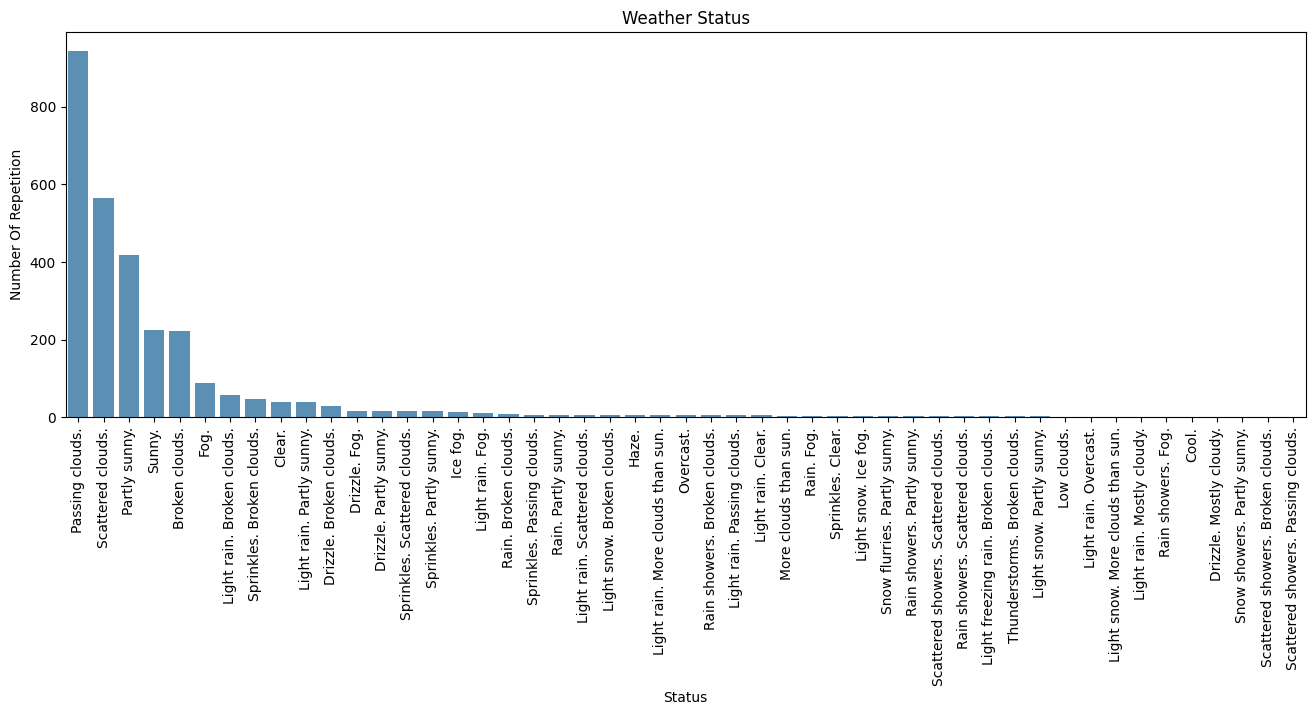

In [ ]:
import seaborn as sns
weather_counts =daily_weather3.weather_cond.value_counts()
plt.figure(figsize=(16,5))
sns.barplot(x=weather_counts.index, y=weather_counts.values, alpha=0.8)
plt.xticks(rotation=90)
plt.title('Weather Status')
plt.xlabel('Status')
plt.ylabel('Number Of Repetition')
plt.show()

In [ ]:
import re
# Function to clean weather descriptions
#deleting the rain/snow (precipitations in general) information if it exists
def clean_weather(description):
    if pd.isna(description):
        return description
    # Split at the first period
    parts = description.split('.', 1)
    if len(parts) > 1 and parts[1].strip():  # Check if the second part is non-empty
        return parts[1].strip()  # Return the part after the first period without adding a period
    else:
        return description  # Return the original description if no useful part after the period
daily_weather3['weather_cond'] = daily_weather3['weather_cond'].apply(clean_weather)
print(daily_weather3)


           Date       temp       wind   humidity    barometer  \
0    2012-01-01  12.520000  19.640000  89.440000  1008.920000   
1    2012-01-02   7.880000  17.200000  78.640000  1008.560000   
2    2012-01-03   9.230769  38.730769  81.769231  1005.307692   
3    2012-01-04   7.461538  26.384615  67.730769  1016.000000   
4    2012-01-05   8.863636  40.500000  75.227273   994.727273   
...         ...        ...        ...        ...          ...   
2860 2019-12-26   3.461538   9.269231  90.807692  1022.384615   
2861 2019-12-27   6.640000   9.480000  91.400000  1027.720000   
2862 2019-12-28   3.346154   6.000000  89.153846  1038.846154   
2863 2019-12-29   2.884615   5.840000  83.230769  1036.307692   
2864 2019-12-30   6.230769  13.000000  48.269231  1030.269231   

              Sunrise           Sunset  Daily Production  \
0     05:30:39.872985  18:29:20.127015               0.5   
1     05:30:46.619181  18:29:13.380819               0.8   
2     05:30:53.884941  18:29:06.115059 

In [ ]:
def reduce_categories(weather):

    weather.weather_cond = weather.weather_cond.map({
        'Ice fog.':'Fog',
        'Haze.':'Fog',
        'Fog.':'Fog',
        'Clear.':'Sunny',
        'Sunny.':'Sunny',
        'Broken clouds.':'Scattered clouds',
        'Scattered clouds.':'Scattered clouds',
        'Overcast.':'Cloudy',
        'More clouds than sun.':'Cloudy',
        'More sun than clouds.':'Sunny',
        'Low clouds.':'Cloudy',
        'Mostly cloudy.':'Cloudy',
        'Cloudy.':'Cloudy',
        'Passing clouds.':'Passing clouds',
        'Partly sunny.':'Partly sunny',
        'Mostly sunny.':'Sunny'
    },na_action='ignore')
    return weather
daily_weather4=daily_weather3.copy()
daily_weather4 = reduce_categories(daily_weather4)

daily_weather4

,Date,temp,wind,humidity,barometer,Sunrise,Sunset,Daily Production,weather_cond
0,2012-01-01,12.520000,19.640000,89.440000,1008.920000,05:30:39.872985,18:29:20.127015,0.5,Cloudy
1,2012-01-02,7.880000,17.200000,78.640000,1008.560000,05:30:46.619181,18:29:13.380819,0.8,Passing clouds
2,2012-01-03,9.230769,38.730769,81.769231,1005.307692,05:30:53.884941,18:29:06.115059,2.9,Partly sunny
3,2012-01-04,7.461538,26.384615,67.730769,1016.000000,05:31:01.668112,18:28:58.331888,0.8,Scattered clouds
4,2012-01-05,8.863636,40.500000,75.227273,994.727273,05:31:09.966389,18:28:50.033611,2.7,Partly sunny
...,...,...,...,...,...,...,...,...,...
2860,2019-12-26,3.461538,9.269231,90.807692,1022.384615,05:30:10.407768,18:29:49.592232,1.0,Sunny
2861,2019-12-27,6.640000,9.480000,91.400000,1027.720000,05:30:14.000023,18:29:45.999977,2.0,Scattered clouds
2862,2019-12-28,3.346154,6.000000,89.153846,1038.846154,05:30:18.121509,18:29:41.878491,1.0,Passing clouds
2863,2019-12-29,2.884615,5.840000,83.230769,1036.307692,05:30:22.771004,18:29:37.228996,3.0,Sunny


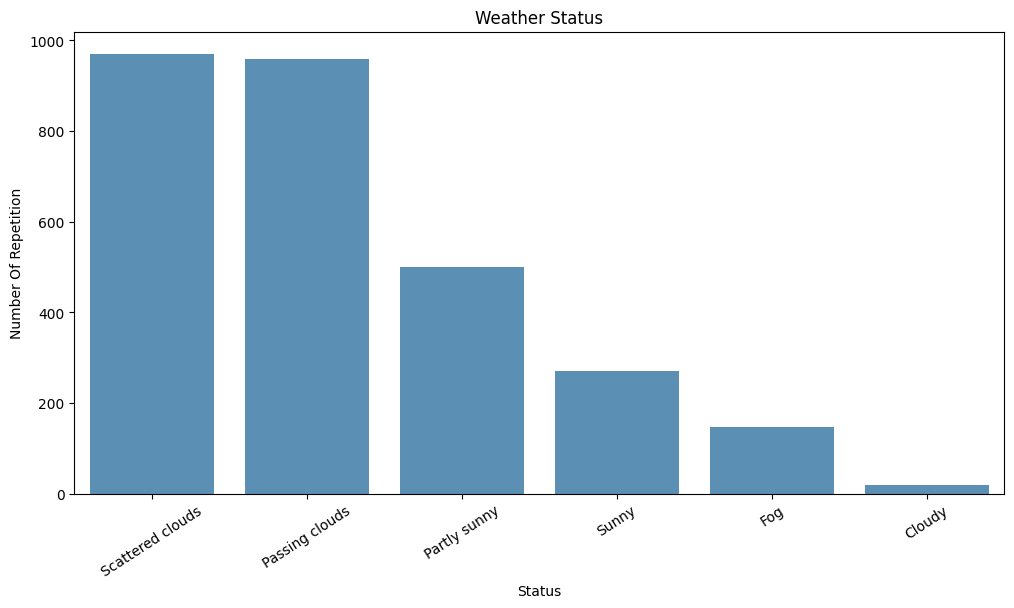

In [ ]:
daily_weather4.weather_cond.value_counts()
weather_counts = daily_weather4.weather_cond.value_counts()

plt.figure(figsize=(12,6))
sns.barplot(x=weather_counts.index, y=weather_counts.values, alpha=0.8)
plt.xticks(rotation=33)
plt.title('Weather Status')
plt.xlabel('Status')
plt.ylabel('Number Of Repetition')
plt.show()



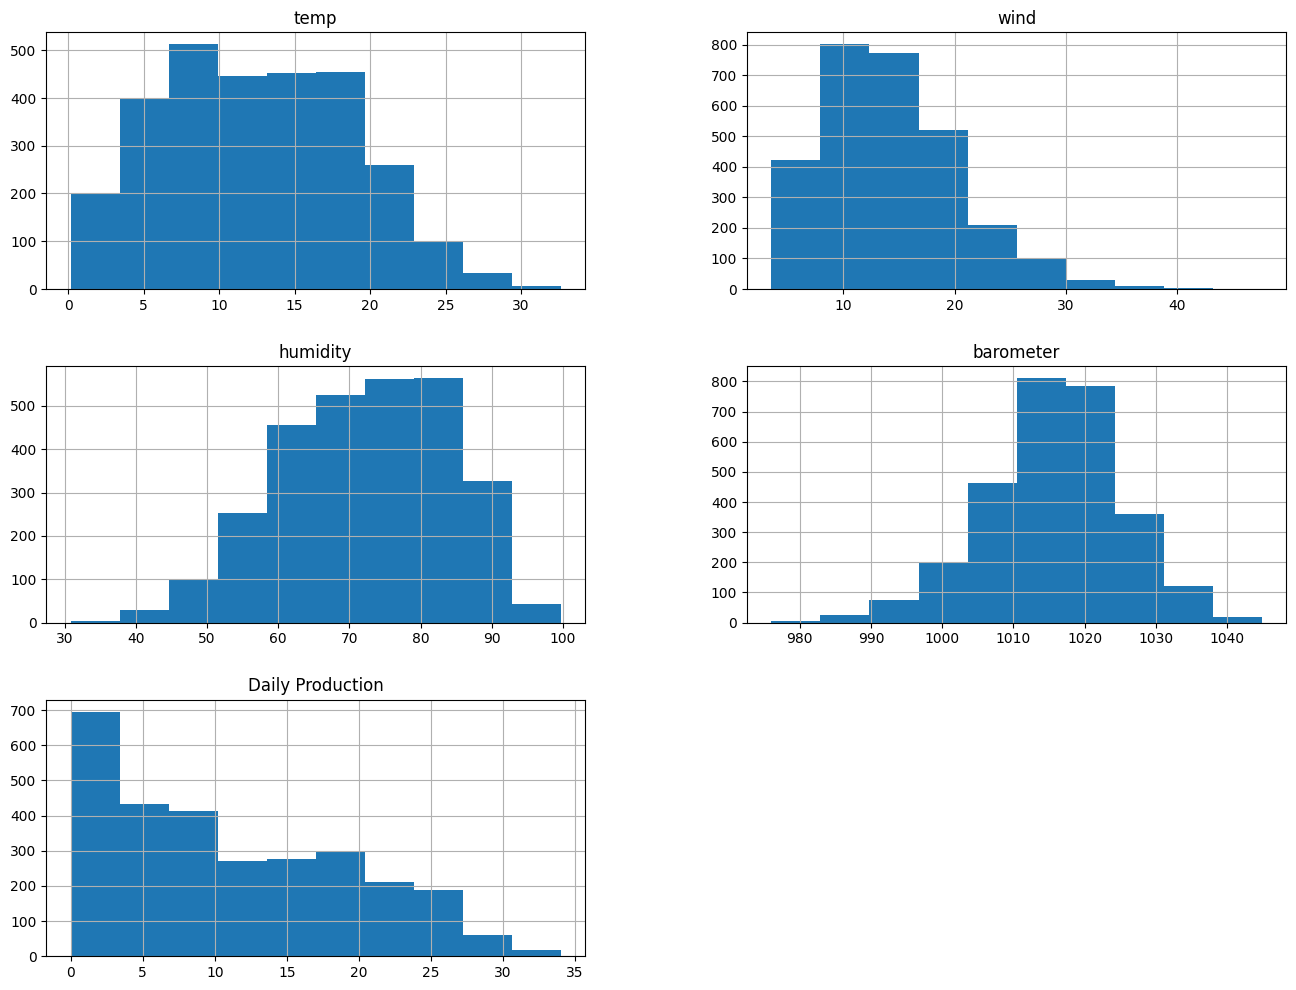

In [ ]:
# Drop the 'date' column
final_data = daily_weather4.drop(columns=['Date'])

# Plot histograms for all columns except 'date'
final_data.hist(figsize=(16,12))  # You can adjust the number of bins if needed
plt.show()

In [ ]:
#splitting data into train data and test data
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(final_data, test_size=0.2, random_state=42)
tsc= train_set.copy()
tsc.describe()

,temp,wind,humidity,barometer,Daily Production
count,2292.000000,2292.000000,2292.000000,2292.000000,2292.000000
mean,12.477203,14.159678,72.175426,1015.566540,10.962740
std,6.278520,6.008636,11.891402,9.611942,8.132283
min,0.160000,3.920000,30.818182,976.038462,0.000000
25%,7.384615,9.409091,63.384387,1009.846154,4.000000
50%,12.060201,13.500000,72.959936,1016.000000,9.950000
75%,17.227273,17.741848,81.377404,1022.043750,17.000000
max,32.619048,47.583333,99.440000,1042.200000,34.000000


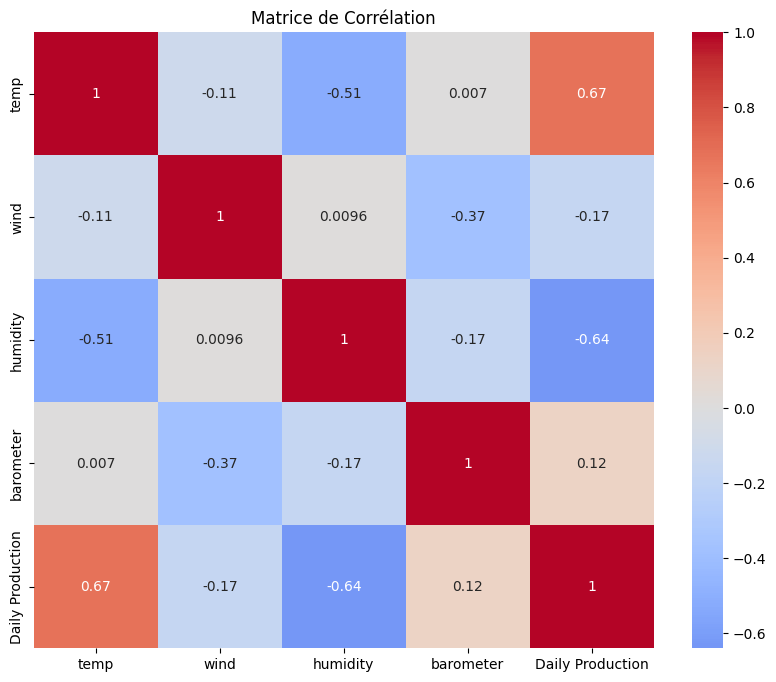

In [ ]:
# Sélectionnez uniquement les colonnes numériques avant de calculer la corrélation
numeric_cols = tsc.select_dtypes(include=['float64', 'int64'])

# Calcul de la matrice de corrélation
correlation_matrix = numeric_cols.corr()

# Affichage de la matrice de corrélation
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title("Matrice de Corrélation")
plt.show()

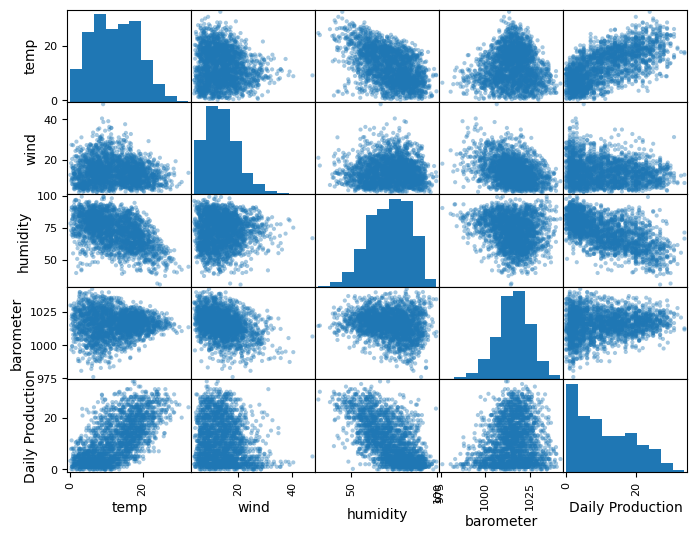

In [ ]:
from pandas.plotting import scatter_matrix
scatter_matrix(tsc, figsize=(8,6), alpha=0.4)
plt.show()

In [ ]:
# Assuming your DataFrame is named df
daily_weather4.to_csv('newdf.csv', index=False)

In [ ]:
# Convert date columns to datetime
daily_weather4['Date'] = pd.to_datetime(daily_weather4['Date'])
# Convert 'Sunrise' and 'Sunset' columns to datetime, including milliseconds
daily_weather4['Sunrise'] = pd.to_datetime(daily_weather4['Sunrise'], format='%H:%M:%S.%f', errors='coerce').dt.time
daily_weather4['Sunset'] = pd.to_datetime(daily_weather4['Sunset'], format='%H:%M:%S.%f', errors='coerce').dt.time


In [ ]:
columns_to_check = ['Date', 'temp', 'wind', 'humidity', 'barometer', 'Sunrise', 'Sunset', 'Daily Production', 'weather_cond']

# Iterate over each column and print the number of missing values
for column in columns_to_check:
    missing_values_count = daily_weather4[column].isna().sum()
    print(f"The number of missing values for column '{column}' is {missing_values_count}.")

df_cleaned = daily_weather4.dropna(subset=['humidity', 'weather_cond'])


The number of missing values for column 'Date' is 0.
The number of missing values for column 'temp' is 0.
The number of missing values for column 'wind' is 0.
The number of missing values for column 'humidity' is 1.
The number of missing values for column 'barometer' is 0.
The number of missing values for column 'Sunrise' is 8.
The number of missing values for column 'Sunset' is 8.
The number of missing values for column 'Daily Production' is 0.
The number of missing values for column 'weather_cond' is 1.


In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
# Split the data into features and target
X = df_cleaned.drop(columns=['Daily Production', 'Date','Sunrise','Sunset'])
y = df_cleaned['Daily Production']


In [ ]:
# Preprocessing pipelines for numeric and categorical features
numeric_features = ['temp', 'wind', 'humidity', 'barometer']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_features = ['weather_cond']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [ ]:
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(df_cleaned.dtypes)

Date                datetime64[ns]
temp                       float64
wind                       float64
humidity                   float64
barometer                  float64
Sunrise                     object
Sunset                      object
Daily Production           float64
weather_cond                object
dtype: object


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV


from sklearn.metrics import mean_absolute_error, mean_squared_error
import xgboost as xgb


models = {
    'RandomForest': RandomForestRegressor(random_state=42),
    'LinearRegression': LinearRegression(),
    'DecisionTree': DecisionTreeRegressor(random_state=42),
    'GradientBoosting': GradientBoostingRegressor(random_state=42),
    'XGBoost': xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
}


param_grids = {
    'RandomForest': {
        'regressor__n_estimators': [100, 200],
        'regressor__max_depth': [None, 10, 20]
    },
    'LinearRegression': {},
    'DecisionTree': {
        'regressor__max_depth': [None, 10, 20]
    },
    'GradientBoosting': {
        'regressor__n_estimators': [100, 200],
        'regressor__learning_rate': [0.01, 0.1]
    },
    'XGBoost': {
        'regressor__n_estimators': [100, 200],
        'regressor__learning_rate': [0.01, 0.1],
        'regressor__max_depth': [3, 6, 10]
    }
}


In [ ]:
def perform_grid_search(model, param_grid):
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', model)
    ])
    grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    return grid_search.best_estimator_

In [ ]:
best_models = {}

# Perform Grid Search for each model and evaluate
for model_name, model in models.items():
    print(f"Tuning {model_name}...")
    best_model = perform_grid_search(model, param_grids[model_name])
    best_models[model_name] = best_model

    # Evaluate the model
    y_pred = best_model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)


    print(f"{model_name} - MAE: {mae:.4f}, MSE: {mse:.4f}, RMSE: {rmse:.4f}")

Tuning RandomForest...
RandomForest - MAE: 4.3818, MSE: 34.4472, RMSE: 5.8692
Tuning LinearRegression...
LinearRegression - MAE: 4.4092, MSE: 32.4350, RMSE: 5.6952
Tuning DecisionTree...
DecisionTree - MAE: 5.1849, MSE: 48.1918, RMSE: 6.9420
Tuning GradientBoosting...
GradientBoosting - MAE: 4.3874, MSE: 33.7554, RMSE: 5.8099
Tuning XGBoost...
XGBoost - MAE: 4.3454, MSE: 33.2286, RMSE: 5.7644


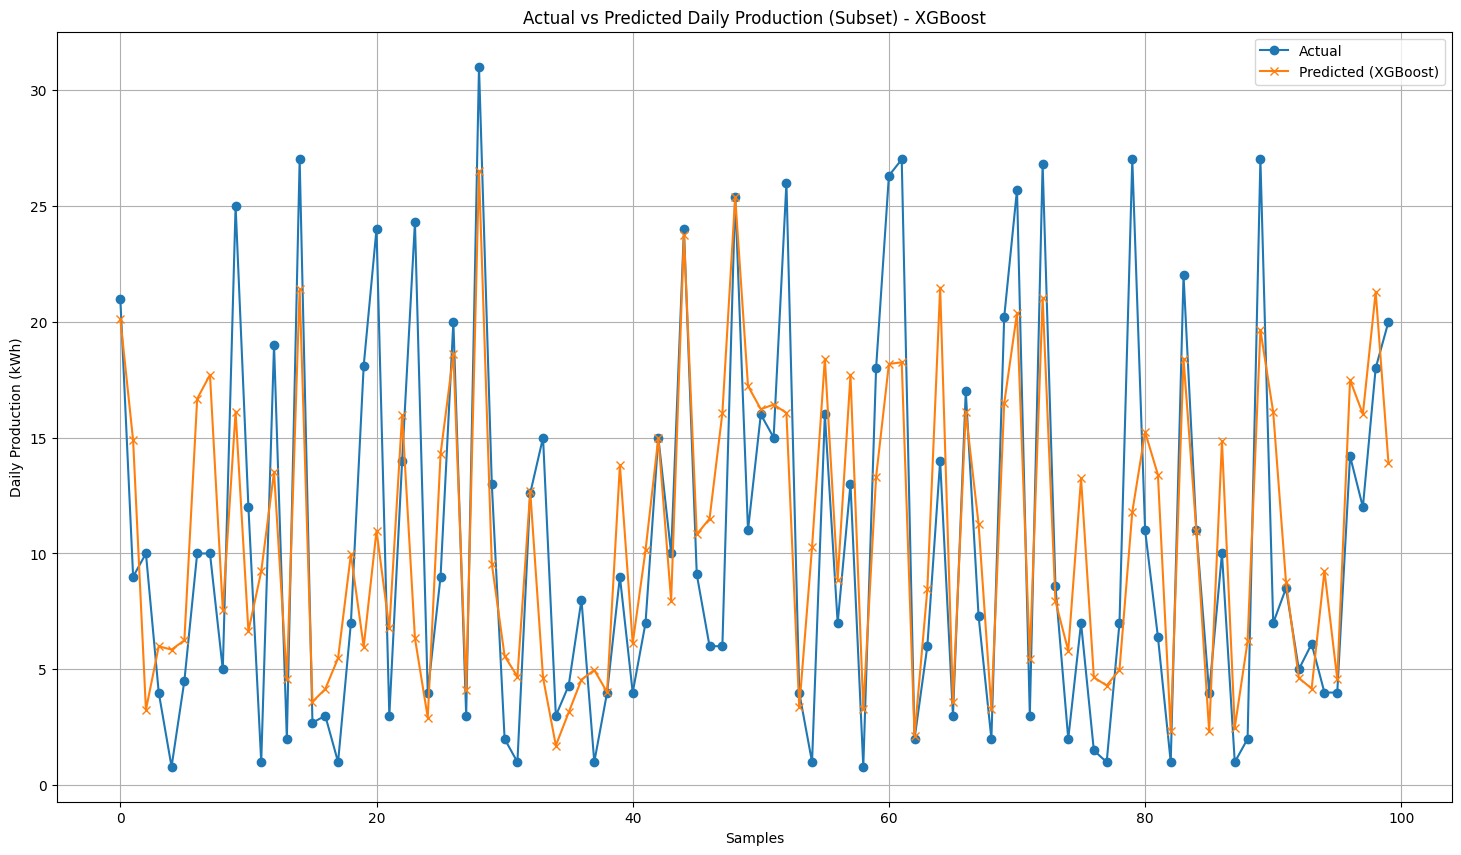

In [ ]:
xgboost_model = best_models['XGBoost']
y_pred_xgboost = xgboost_model.predict(X_test)


plt.figure(figsize=(18, 10))
subset = 100
plt.plot(y_test[:subset].values, label='Actual', marker='o')
plt.plot(y_pred_xgboost[:subset], label='Predicted (XGBoost)', marker='x')
plt.xlabel('Samples')
plt.ylabel('Daily Production (kWh)')
plt.title('Actual vs Predicted Daily Production (Subset) - XGBoost')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
def segment1_func(x):
    return 5 + x

def segment2_func(x):
    return x - 5

# Calculate the number of points lying between the green and blue segments
between_segments = np.sum((y_pred_xgboost >= segment2_func(y_test)) & (y_pred_xgboost <= segment1_func(y_test)))

# Calculate the percentage
percentage_between_segments = (between_segments / len(y_test)) * 100

print(f"Percentage of points between the green and blue segments: {percentage_between_segments:.2f}%")


Percentage of points between the green and blue segments: 66.67%


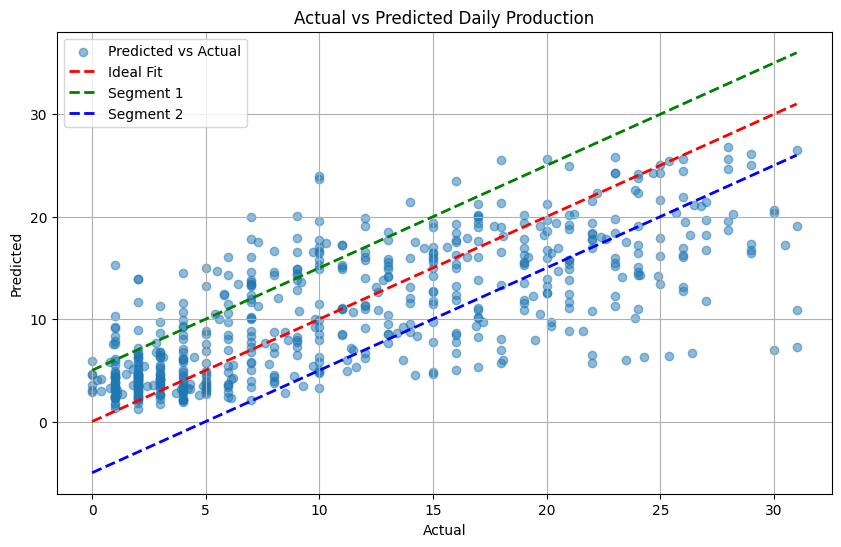

In [ ]:
# Compute min and max for the segments to cover the entire data range
x_min, x_max = y_test.min(), y_test.max()

# Define the segments
segment1_y = [5 + x_min, 5 + x_max]  # y = x + 5
segment2_y = [x_min - 5, x_max - 5]  # y = x - 5

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_xgboost, alpha=0.5, label='Predicted vs Actual')
plt.plot([x_min, x_max], [x_min, x_max], '--r', linewidth=2, label='Ideal Fit')
plt.plot([x_min, x_max], segment1_y, '--g', linewidth=2, label='Segment 1')
plt.plot([x_min, x_max], segment2_y, '--b', linewidth=2, label='Segment 2')

plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Daily Production')
plt.legend()
plt.grid(True)
plt.show()